# Scraping insight Data Science fellows data

In this notebook, I'll extract data about insight fellows in order to learn more about past programs fellows and the kind of jobs they obtain after completing the program. I'll use `requests` for obtaining webpages, `Beautiful Soup` for parsing webpages and extracting data and `pandas` for analyzing the data.

### import libraries:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### Get web page:

In [2]:
url = 'https://www.insightdatascience.com/fellows'
response = requests.get(url)
response

<Response [200]>

This is the [HTTP response status code](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) that was received. For example: 200 - means succsess and 404 - means not found.

### Extract content:

First, let's look at the entire html structure to understand how it is built and what would we want to extract

In [3]:
content = BeautifulSoup(response.content, 'html.parser')
# print(content.prettify())

In this case there are a lot of fellows and therefore our data is distributed across a few pages. Let's start by extracting the links to all the pages we need:

In [4]:
urls = []
urls.append(url)
a = content.find('a', {'class':'w-pagination-next'})

while a:
    next_url = url + a['href']
    urls.append(next_url)
    r = requests.get(next_url)
    c = BeautifulSoup(r.content, 'html.parser')
    a = c.find('a', {'class':'w-pagination-next'})
    
urls

['https://www.insightdatascience.com/fellows',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=2',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=3',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=4',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=5',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=6',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=7',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=8']

All the information about each fellow is placed under a `<div>` section of class `fellows_tooltip`, So all we have to do is to find all the `<div class="fellows_tooltip">` sections in each one of the urls and then for each instance append the name, title, company, project, and background of each fellow in to the corresponding list:

In [5]:
# create lists for every data element
fellow_name = []
fellow_title = []
fellow_company = []
fellow_project = []
fellow_background = []

for u in urls:
    r = requests.get(u)
    c = BeautifulSoup(r.content, 'html.parser')
    # find all the fellow tool tips and append each data element to the corresponding list
    for tooltip in c.find_all('div', {'class':'fellows_tooltip'}):
        fellow_name.append(tooltip.find('div', {'class':'tooltip_name'}).text)
        fellow_title.append(tooltip.find('div', {'class':'toottip_title'}).text)
        fellow_company.append(tooltip.find('div', {'class':'tooltip_company'}).text)
        fellow_project.append(tooltip.find('div', {'class':'tooltip_project'}).text)
        fellow_background.append(tooltip.find('div', {'class':'tooltip_background'}).text)

# create a dictionary to hold all the data
data = {'name':fellow_name, 'title':fellow_title, 'company':fellow_company,\
        'project':fellow_project, 'background':fellow_background}

In [6]:
fellow_data = pd.DataFrame(data) # data frame of fellows data
num_fellows = len(fellow_data.index) # total number of fellows 
fellow_data

,name,title,company,project,background
0,JP Bida,Director of Risk,Capital One,Measuring the Impact of Open Source Coders on ...,"Bio-X Games, Stanford, Postdoc"
1,Douglas Mason,Data Scientist,Twitter,Email Searcher: Search & Visualize Your Mailbox,"Physics, Harvard University, PhD\n"
2,Virot Ta Chiraphadhanakul,Data Scientist,Facebook,Tweet Timeline: Visualizing the Impact of Soci...,"Operations Research, MIT, PhD"
3,Julia Viladomat,Data Scientist,Adobe,Sentiment Analysis Based on Social Media,"Statistics, Stanford, Postdoc"
4,David Freeman,Head of Anti-Abuse Engineering,LinkedIn,Flight Delay Predictor,"Mathematics, Stanford, Postdoc"
5,Jessica Zúñiga,Senior Data Scientist,LinkedIn,Email Contacts Automatically Grouped & Ranked,"Mathematics, Duke, Postdoc"
6,Harold Nguyen,Data Scientist,Proofpoint,Analysis of New York Stop-and-Frisk Data,"Physics, UC Riverside, PhD"
7,Sebastien de Larquier,Data Scientist,Netflix,CouchTube: YouTube TV shows in one click,"Space Physics, Virgina Tech, PhD"
8,Paula Therese Lang,Senior Data Scientist,CreativeLIVE,SchoolGeo: Empowering Parents to Make Informed...,"Computational Biology, UC Berkeley, Postdoc"
9,Nan Ma,Data Engineer,Microsoft Yammer,Event Map: Get Local News from Twitter,"Electrical Engineering & Computer Science, UC ..."


How many fellows do we have in this dataset?

In [7]:
num_fellows

794

### Analyze data

Let's explore the background education of the fellows

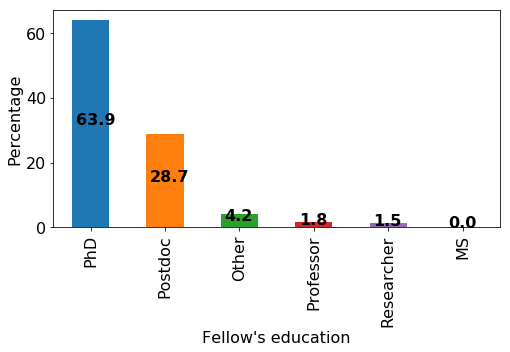

In [8]:
PhD = fellow_data.background.str.contains('PhD|Ph.D|DPh')
PhD_per = 100 * PhD.sum()/num_fellows

Post = fellow_data.background.str.contains('Postdoc')
Post_per = 100 * Post.sum()/num_fellows

MS = fellow_data.background.str.contains('MS')
MS_per = 100 * MS.sum()/num_fellows

Prof = fellow_data.background.str.contains('Professor|Faculty')
Prof_per = 100 * Prof.sum()/num_fellows

Researcher = fellow_data.background.str.contains('Research Scientist|Research Associate|Research Assistant')
Researcher_per = 100 * Researcher.sum()/num_fellows

other = ~(PhD | Post | MS | Prof | Researcher)
other_per = 100 * other.sum()/num_fellows

education = ['PhD', 'Postdoc', 'MS', 'Professor', 'Researcher', 'Other']
ed_percentage = [PhD_per, Post_per, MS_per, Prof_per, Researcher_per, other_per]
fellows_education = pd.Series(data= ed_percentage, index= education).sort_values(ascending = False)


plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
fellows_education.plot('bar')
plt.xlabel('Fellow\'s education')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_education):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

We have 4.2% which are not included in any category. Let's check their background:

In [9]:
pd.set_option('display.max_colwidth', -1)
fellow_data[other]

,name,title,company,project,background
42,Matthew Folz,Data Scientist,Facebook,"GameChooser: Intelligent viewing recommendations for NBA games, The University of British Columbia, PhD","Probability Theory and Stochastic Processes,"
106,Vanessa Heckman,Data Mining Scientist,Apple,Lenderstanding: Helping lenders help,"Civil Engineering, Geophysics, Caltech/California Institute of Technology"
182,Yvonne Edmonds,Generics Analytics-Data Scientist,McKesson,FantasyFilm: Can you make a better film than Hollywood?,"Physics, Stanford, Systems Engineer"
201,Matt Langner,Data Scientist,Facebook,the Blogtimize/r/: Find your audience and test the relevance of your blog,"Physics, Lawrence Berkeley National Lab Scientist"
263,Eric White,Data Scientist,Silicon Valley Data Science,Scene Hash: Find live shows based on any artist,"High Energy Particle Physics, California Polytechnic State University, Lecturer"
265,Douglas Rudd,Data Scientist,Stitch Fix,WhatsInMy.pics: Finding relevant images and tags based on image content,"High Performance Computing, University of Chicago, Staff"
273,Stephen Muchovej,Data Scientist,Quottly,rep-present.us: Find out what your state representative is pushing in the legislature,"Astrophysics, California Institute of Technology, Staff"
278,Matthew Hoover,Data Scientist,Gallup,MealTime!: Know when your food will arrive,"Analytics & Strategy, Agricultural Microfinance, One Acre Fund, Manager"
285,Fred Kiwanuka,Data Scientist Researcher,UNICEF,Vacadvisor: Budget based vacation recommender,"Computing, MIT, Fellow"
346,Evgeny Shapiro,Research Scientist,GNS Healthcare,Textbooks Unchained: Find free textbooks with the help of recommendations from Amazon,"Evident Point Software, Software Developer"


#### What fields in the academia are they coming from?

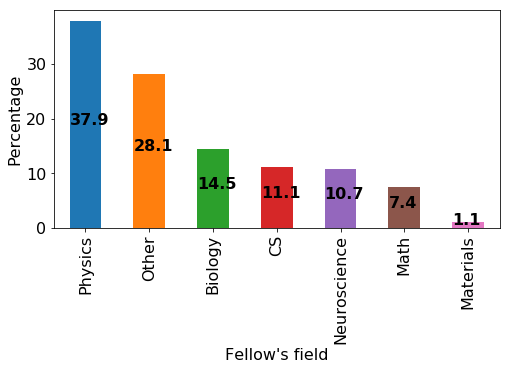

In [10]:
Physics = fellow_data.background.str.contains('Physics|physics|Astrophysics|Astronomy|Quantum')
Physics_per = 100 * Physics.sum()/num_fellows

Neuro = fellow_data.background.str.contains('Neuro|Neural')
Neuro_per = 100 * Neuro.sum()/num_fellows

Math = fellow_data.background.str.contains('Mathematics|Mathematical')
Math_per = 100 * Math.sum()/num_fellows

CS = fellow_data.background.str.contains('Computer|Computational')
CS_per = 100 * CS.sum()/num_fellows

Materials = fellow_data.background.str.contains('Materials')
Materials_per = 100 * Materials.sum()/num_fellows

Bio = fellow_data.background.str.contains('Bio')
Bio_per = 100 * Bio.sum()/num_fellows

Other = ~(Physics | Neuro | Math | CS | Materials | Bio)
Other_per = 100 * Other.sum()/num_fellows

edu_field = ['Physics', 'Neuroscience','Math', 'CS', 'Materials', 'Biology', 'Other']
field_percentage = [Physics_per, Neuro_per, Math_per, CS_per, Materials_per, Bio_per, Other_per]
fellows_field = pd.Series(field_percentage, index = edu_field).sort_values(ascending = False)

plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
fellows_field.plot('bar')
plt.xlabel('Fellow\'s field')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_field):
    plt.text(i -.25, v/2, str(round(v,1)), fontweight = 'bold')

Let's see what other fields exists:

In [11]:
fellow_data.background[Other]

2      Operations Research, MIT, PhD                                                    
3      Statistics, Stanford, Postdoc                                                    
18     Environmental Energy, UC Berkeley, Postdoc                                       
21     Atmospheric Chemistry, Harvard, PhD                                              
24     Aeronautics, California Institute of Technology, PhD                             
25     Clinical Translational Informatics, Harvard Medical School, Postdoc              
26     Genetics, Stanford, PhD                                                          
28     Molecular Imaging, Stanford, Postdoc                                             
35     Genomics, UC Berkeley, Postdoc                                                   
37     Electrical Engineering, Stanford, PhD                                            
42     Probability Theory and Stochastic Processes,                                     
45     Chemical Engin

#### What are the most common companies for fellows to work for after the program?

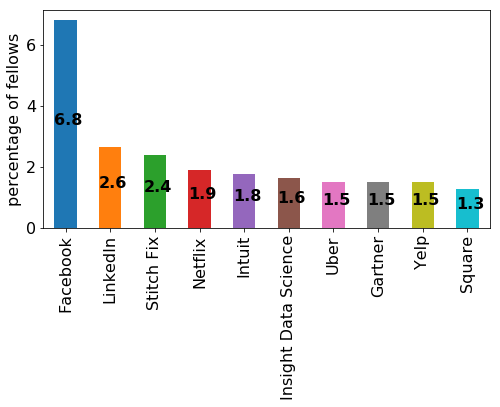

In [12]:
companies = fellow_data.company.value_counts()
companies_per = 100*companies.head(10)/num_fellows # show percentage for top 10 companies
 
plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
companies_per.plot('bar')
plt.ylabel('percentage of fellows')
for i,v in enumerate(companies_per):
    plt.text(i -.25, v/2, str(round(v,1)), fontweight = 'bold')

#### What are the most common titles of fellows after the program?

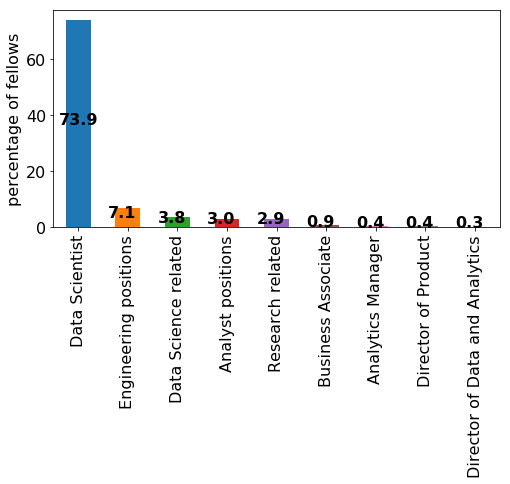

In [13]:
# Clean titles and merge similar titles
clean_titles = fellow_data.title
clean_titles.values[clean_titles.str.contains('Data Scientist').tolist()] = 'Data Scientist'
clean_titles.values[clean_titles.str.contains('Data Science').tolist()] = 'Data Science related'
clean_titles.values[clean_titles.str.contains('Research').tolist()] = 'Research related'
clean_titles.values[clean_titles.str.contains('Engineer').tolist()] = 'Engineering positions'
clean_titles.values[clean_titles.str.contains('Analyst').tolist()] = 'Analyst positions'

titles = clean_titles.value_counts()

# take 10 most popular titles and convert to percentage
titles_per = 100*titles.head(10)/num_fellows
titles_per = titles_per.drop('')
plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
titles_per.plot('bar')
plt.ylabel('percentage of fellows')
for i,v in enumerate(titles_per):
    plt.text(i -.4, v/2, str(round(v,1)), fontweight = 'bold')